In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from loader import load_files
from matplotlib.pyplot import figure
from tie import FFTSolver2D
from finite_difference import central_finite_difference

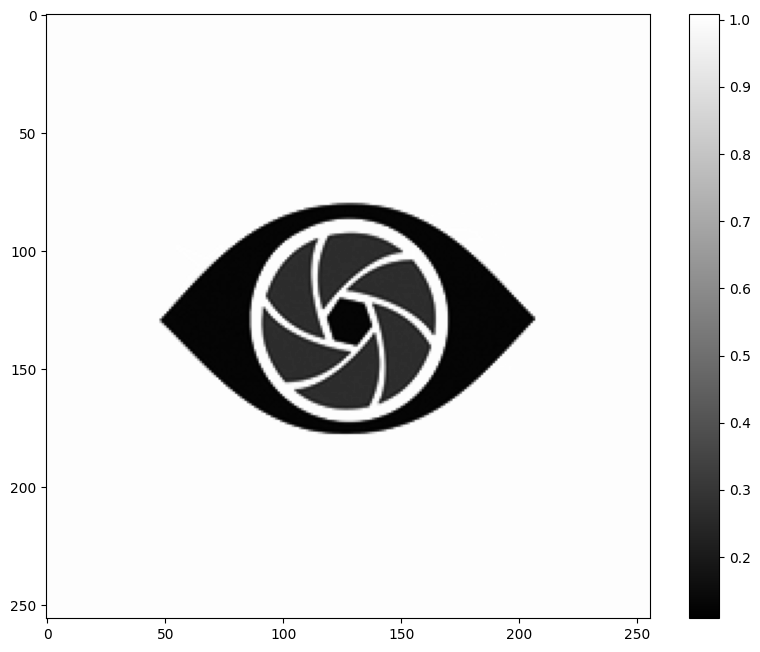

In [54]:
i1_path = '../propagation/propagated_fields/sci_lab_intensity_tie_phase/z=0.001.npy'
i2_path = '../propagation/propagated_fields/sci_lab_intensity_tie_phase/z=-0.001.npy'
intensities = [np.abs(field) ** 2 for field in load_files([i1_path, i2_path])]

figure(figsize=(10, 8), dpi=100)
plt.imshow(intensities[0], cmap='gray')
plt.colorbar()
plt.show()

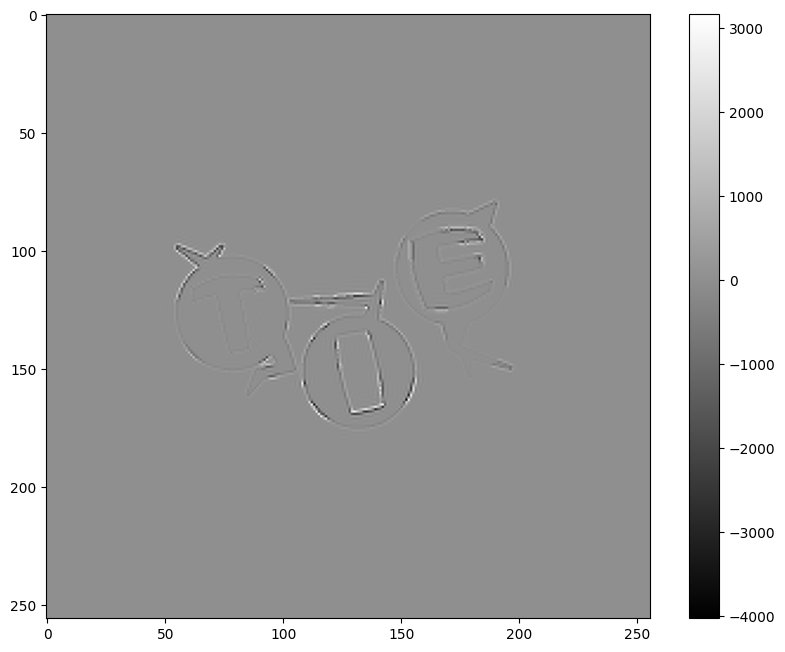

In [51]:
dz = 0.000002 # 2 mkm
axial_derivative = central_finite_difference(intensities, dz)
figure(figsize=(10, 8), dpi=100)
plt.imshow(axial_derivative, cmap='gray')
plt.colorbar()
plt.show()

np.save(f'axial_derivative/sci_lab_intensity_tie_phase/sci_lab_intensity_tie_phase_dz={dz*1000:.3f}mm.npy', axial_derivative)

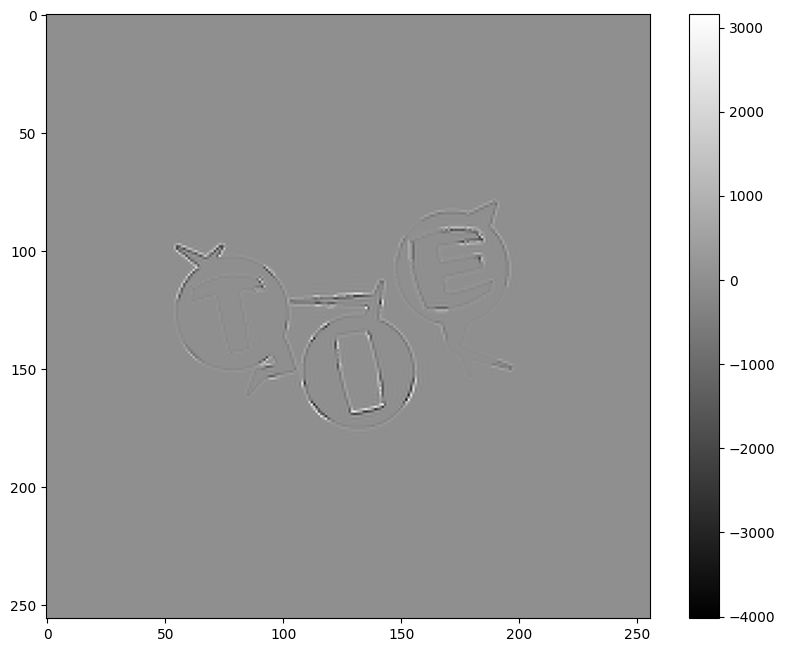

In [52]:
axial_derivative_image = np.load('axial_derivative/sci_lab_intensity_tie_phase/sci_lab_intensity_tie_phase_dz=0.010mm.npy')
figure(figsize=(10, 8), dpi=100)
plt.imshow(axial_derivative_image, cmap='gray')
plt.colorbar()
plt.show()

In [55]:
dz = -0.000002  # 2 mkm
px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm
threshold = 0.1

solver = FFTSolver2D(intensities, dz, wavelength, px_size)
retrieved_phase = solver.solve(threshold)
filename = f'sci_lab_intensity_tie_phase_dz={dz*1000:.3f}mm.npy'
save_folder = 'retrieved_phases/sci_lab_intensity_tie_phase'
save_path = os.path.join(save_folder, filename)
np.save(save_path, retrieved_phase)

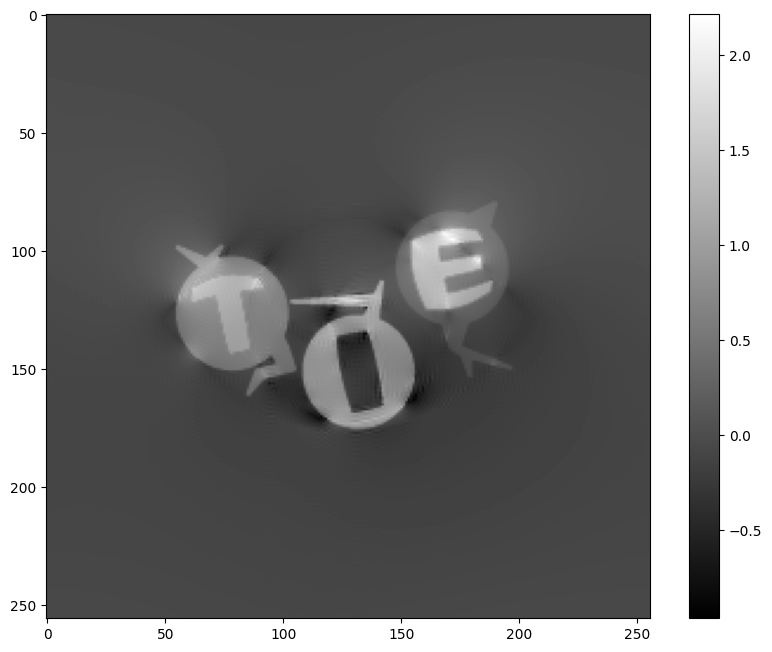

In [56]:
figure(figsize=(10, 8), dpi=100)
plt.imshow(np.load(f'{save_folder}/{filename}'), cmap='gray')
plt.colorbar()
plt.show()